In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

SEED = 42

In [3]:
import sys
sys.path.append("utils")
from train_utils import *

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.


#### Dataset

In [4]:
restored = pd.read_pickle("full_extended_train_df.pkl")

In [5]:
TRAIN_DATASET = TrainDataset(restored[100_000:105_000])
# TRAIN_DATASET = TrainDataset(restored)

TRAIN_DATASET._df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,gender,registered_via,age_group,...,artist_name,composer,lyricist,language,genre_ids_count,artist_name_count,composer_count,lyricist_count,isrc_country,isrc_year
5969223,+xqMkt1QiZOzECY304MrJM0O7LFQoCr1c4Z7GpTih3o=,RiJp0d9j7dfyZ/pyUPtWLXiVp77iitN5lUQTR6qjEOg=,my library,Local playlist more,local-playlist,1,13,male,3,young,...,吳克群 (Kenji Wu),Kenji Wu| Mo An Qi,Kenji Wu| Mo An Qi,3.0,1,1,2,2,"Taiwan, Province of China",2016
3407902,+xqMkt1QiZOzECY304MrJM0O7LFQoCr1c4Z7GpTih3o=,Yc+uTQzM90srYDO5RqkalJ8gg8WODb6akqGN75OpObQ=,my library,Local playlist more,local-playlist,0,13,male,3,young,...,Beyoncé,FILL_NAN,FILL_NAN,52.0,1,1,0,0,United States,2008
421290,+xqMkt1QiZOzECY304MrJM0O7LFQoCr1c4Z7GpTih3o=,yNsS8m+j5CP2LH2B+rq9knxaozh5MqIEq31XiSIVDAQ=,my library,Local playlist more,local-playlist,0,13,male,3,young,...,Various Artists,Kim Ji Su,FILL_NAN,31.0,1,1,1,0,"Korea, Republic of",2016
421291,+xqMkt1QiZOzECY304MrJM0O7LFQoCr1c4Z7GpTih3o=,EfJnvKhjaAl7I2+OAkPzFIq/FBvBjZurEKr4VGViqj4=,my library,Local playlist more,local-playlist,1,13,male,3,young,...,Baek A Yeon,Tablo| Tukutz| Conan| Roco,Tablo| Mithra| Ji Hoon| Goo Ji An,31.0,1,1,4,4,-1,-1
2283742,+xqMkt1QiZOzECY304MrJM0O7LFQoCr1c4Z7GpTih3o=,j45LrR5XSQUhChRvzsu2GPEREgsuJOAqoT2NLMDPhnc=,my library,Local playlist more,local-playlist,1,13,male,3,young,...,Various Artists,Lucid Fall,Lucid Fall,31.0,1,1,1,1,"Korea, Republic of",2012


#### CatBoost

In [6]:
%%time
catboost_model = CatBoostModel(loss_function="YetiRank", 
                                 iterations=150, 
                                 task_type="CPU", 
                                 random_state=SEED)

catboost_auc_per_query = get_metric(catboost_model, TRAIN_DATASET, n_splits=5)

--- Split: 1/5 ---
Groupwise loss function. OneHotMaxSize set to 10
0:	total: 75.5ms	remaining: 11.3s
1:	total: 99.2ms	remaining: 7.34s
2:	total: 122ms	remaining: 5.98s
3:	total: 143ms	remaining: 5.21s
4:	total: 165ms	remaining: 4.78s
5:	total: 197ms	remaining: 4.72s
6:	total: 234ms	remaining: 4.77s
7:	total: 259ms	remaining: 4.6s
8:	total: 285ms	remaining: 4.47s
9:	total: 314ms	remaining: 4.39s
10:	total: 353ms	remaining: 4.46s
11:	total: 387ms	remaining: 4.44s
12:	total: 409ms	remaining: 4.31s
13:	total: 430ms	remaining: 4.18s
14:	total: 458ms	remaining: 4.12s
15:	total: 481ms	remaining: 4.03s
16:	total: 505ms	remaining: 3.95s
17:	total: 528ms	remaining: 3.87s
18:	total: 554ms	remaining: 3.82s
19:	total: 577ms	remaining: 3.75s
20:	total: 601ms	remaining: 3.69s
21:	total: 622ms	remaining: 3.62s
22:	total: 643ms	remaining: 3.55s
23:	total: 667ms	remaining: 3.5s
24:	total: 696ms	remaining: 3.48s
25:	total: 722ms	remaining: 3.44s
26:	total: 751ms	remaining: 3.42s
27:	total: 774ms	remaini

90:	total: 2.33s	remaining: 1.51s
91:	total: 2.36s	remaining: 1.49s
92:	total: 2.38s	remaining: 1.46s
93:	total: 2.41s	remaining: 1.43s
94:	total: 2.43s	remaining: 1.41s
95:	total: 2.46s	remaining: 1.38s
96:	total: 2.49s	remaining: 1.36s
97:	total: 2.51s	remaining: 1.33s
98:	total: 2.54s	remaining: 1.31s
99:	total: 2.58s	remaining: 1.29s
100:	total: 2.6s	remaining: 1.26s
101:	total: 2.63s	remaining: 1.24s
102:	total: 2.66s	remaining: 1.21s
103:	total: 2.69s	remaining: 1.19s
104:	total: 2.71s	remaining: 1.16s
105:	total: 2.73s	remaining: 1.14s
106:	total: 2.76s	remaining: 1.11s
107:	total: 2.79s	remaining: 1.08s
108:	total: 2.81s	remaining: 1.06s
109:	total: 2.83s	remaining: 1.03s
110:	total: 2.86s	remaining: 1s
111:	total: 2.88s	remaining: 978ms
112:	total: 2.91s	remaining: 953ms
113:	total: 2.93s	remaining: 927ms
114:	total: 2.96s	remaining: 901ms
115:	total: 2.99s	remaining: 876ms
116:	total: 3.01s	remaining: 850ms
117:	total: 3.04s	remaining: 824ms
118:	total: 3.06s	remaining: 798ms

30:	total: 876ms	remaining: 3.36s
31:	total: 905ms	remaining: 3.34s
32:	total: 930ms	remaining: 3.3s
33:	total: 957ms	remaining: 3.27s
34:	total: 983ms	remaining: 3.23s
35:	total: 1.01s	remaining: 3.2s
36:	total: 1.04s	remaining: 3.17s
37:	total: 1.07s	remaining: 3.14s
38:	total: 1.1s	remaining: 3.12s
39:	total: 1.12s	remaining: 3.09s
40:	total: 1.15s	remaining: 3.06s
41:	total: 1.18s	remaining: 3.03s
42:	total: 1.2s	remaining: 3s
43:	total: 1.23s	remaining: 2.96s
44:	total: 1.26s	remaining: 2.93s
45:	total: 1.28s	remaining: 2.9s
46:	total: 1.32s	remaining: 2.88s
47:	total: 1.34s	remaining: 2.85s
48:	total: 1.37s	remaining: 2.82s
49:	total: 1.4s	remaining: 2.79s
50:	total: 1.42s	remaining: 2.77s
51:	total: 1.45s	remaining: 2.73s
52:	total: 1.48s	remaining: 2.71s
53:	total: 1.51s	remaining: 2.68s
54:	total: 1.54s	remaining: 2.65s
55:	total: 1.56s	remaining: 2.63s
56:	total: 1.59s	remaining: 2.6s
57:	total: 1.62s	remaining: 2.57s
58:	total: 1.65s	remaining: 2.54s
59:	total: 1.67s	remaini

119:	total: 3.51s	remaining: 878ms
120:	total: 3.55s	remaining: 851ms
121:	total: 3.58s	remaining: 823ms
122:	total: 3.62s	remaining: 795ms
123:	total: 3.66s	remaining: 767ms
124:	total: 3.69s	remaining: 739ms
125:	total: 3.73s	remaining: 710ms
126:	total: 3.77s	remaining: 682ms
127:	total: 3.8s	remaining: 653ms
128:	total: 3.83s	remaining: 624ms
129:	total: 3.87s	remaining: 595ms
130:	total: 3.9s	remaining: 566ms
131:	total: 3.94s	remaining: 537ms
132:	total: 3.97s	remaining: 508ms
133:	total: 4s	remaining: 478ms
134:	total: 4.03s	remaining: 448ms
135:	total: 4.05s	remaining: 417ms
136:	total: 4.09s	remaining: 388ms
137:	total: 4.13s	remaining: 360ms
138:	total: 4.17s	remaining: 330ms
139:	total: 4.2s	remaining: 300ms
140:	total: 4.23s	remaining: 270ms
141:	total: 4.27s	remaining: 241ms
142:	total: 4.3s	remaining: 211ms
143:	total: 4.33s	remaining: 180ms
144:	total: 4.36s	remaining: 150ms
145:	total: 4.39s	remaining: 120ms
146:	total: 4.42s	remaining: 90.2ms
147:	total: 4.45s	remainin

In [7]:
catboost_auc_per_query

,AUC_per_query
split: 1,0.564719
split: 2,0.536194
split: 3,0.714207
split: 4,0.738907
split: 5,0.67277
avg,0.645359


In [8]:
shap_catboost = ShapValuesCatBoost()
shap_catboost.fit(TRAIN_DATASET)

Train size: 4000 | Test size: 1000
Groupwise loss function. OneHotMaxSize set to 10
0:	total: 25.4ms	remaining: 3.78s
1:	total: 56.1ms	remaining: 4.15s
2:	total: 83.4ms	remaining: 4.09s
3:	total: 111ms	remaining: 4.04s
4:	total: 141ms	remaining: 4.1s
5:	total: 167ms	remaining: 4.01s
6:	total: 195ms	remaining: 3.99s
7:	total: 224ms	remaining: 3.98s
8:	total: 250ms	remaining: 3.91s
9:	total: 279ms	remaining: 3.91s
10:	total: 308ms	remaining: 3.89s
11:	total: 333ms	remaining: 3.82s
12:	total: 358ms	remaining: 3.77s
13:	total: 388ms	remaining: 3.77s
14:	total: 413ms	remaining: 3.71s
15:	total: 444ms	remaining: 3.72s
16:	total: 468ms	remaining: 3.66s
17:	total: 494ms	remaining: 3.62s
18:	total: 517ms	remaining: 3.56s
19:	total: 544ms	remaining: 3.54s
20:	total: 569ms	remaining: 3.5s
21:	total: 595ms	remaining: 3.46s
22:	total: 621ms	remaining: 3.43s
23:	total: 651ms	remaining: 3.42s
24:	total: 676ms	remaining: 3.38s
25:	total: 697ms	remaining: 3.32s
26:	total: 718ms	remaining: 3.27s
27:	tot

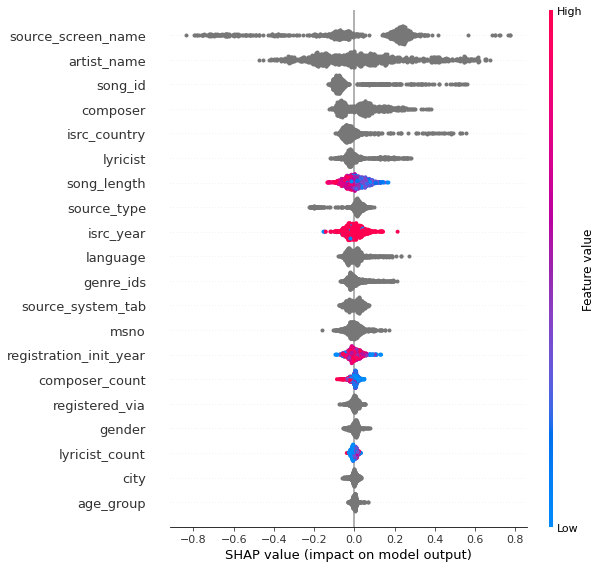

In [9]:
shap_catboost.show_shap_values()

#### Embeddings

In [10]:
%%time
embedding_model_v1 = EmbeddingModel_v1(embedding_dim=100, random_state=SEED, min_count=5)
embedding_auc_per_query = get_metric(embedding_model_v1, TRAIN_DATASET, n_splits=5)

--- Split: 1/5 ---
Fit items...


Fit users: 100%|██████████| 20/20 [00:00<00:00, 4417.15it/s]


--- Split: 2/5 ---
Fit items...


Fit users: 100%|██████████| 20/20 [00:00<00:00, 4298.10it/s]

--- Split: 3/5 ---
Fit items...



Fit users: 100%|██████████| 19/19 [00:00<00:00, 3905.50it/s]


--- Split: 4/5 ---
Fit items...


Fit users: 100%|██████████| 19/19 [00:00<00:00, 4022.81it/s]


--- Split: 5/5 ---
Fit items...


Fit users: 100%|██████████| 18/18 [00:00<00:00, 3103.70it/s]

CPU times: user 407 ms, sys: 15.4 ms, total: 422 ms
Wall time: 404 ms


In [11]:
embedding_auc_per_query

,AUC_per_query
split: 1,0.5
split: 2,0.5
split: 3,0.5
split: 4,0.5
split: 5,0.5
avg,0.5


In [12]:
%%time
embedding_model_v2 = EmbeddingModel_v2()
embedding_model_v2.fit(TRAIN_DATASET)

100%|██████████| 2251/2251 [00:00<00:00, 10874.26it/s]


CPU times: user 586 ms, sys: 8.01 ms, total: 594 ms
Wall time: 606 ms


#### Similars

In [13]:
embedding_model_v2.get_similars("Beyoncé")

[('Flo Rida', 0.9970958232879639),
 ('Pitbull', 0.9952583312988281),
 ("Dustin O'Halloran", 0.9950389266014099),
 ('張韶涵 (Angela Chang)', 0.9949893951416016),
 ('Ludovico Einaudi', 0.9948204755783081),
 ('MAJOR LAZER', 0.9945626258850098),
 ('Goldmund', 0.9943797588348389),
 ('Meghan Trainor', 0.9941400289535522),
 ('LEE HI', 0.9937386512756348),
 ('Eminem', 0.9935135245323181)]

In [14]:
embedding_model_v2.get_similars("OneRepublic")

[('Wiz Khalifa', 0.9940512776374817),
 ('Zedd', 0.9936017394065857),
 ('Imagine Dragons', 0.9924752712249756),
 ('Taylor Swift', 0.9923356771469116),
 ('Linkin Park', 0.9920865297317505),
 ('Drake', 0.9915052652359009),
 ('ジブリサウンドトラック', 0.9914237856864929),
 ('Fall Out Boy', 0.9912816286087036),
 ('Amy Winehouse', 0.9912553429603577),
 ('小樂 (吳思賢) (Ben Wu)', 0.9910189509391785)]

In [15]:
embedding_model_v2.get_similars("Bruno Mars")

[('Ariana Grande', 0.989454984664917),
 ('twenty one pilots', 0.9892728924751282),
 ('Calvin Harris', 0.9880154132843018),
 ('Ellie Goulding', 0.987788736820221),
 ('Alan Walker', 0.9877884984016418),
 ('Redfoo', 0.9866756200790405),
 ('Justin Timberlake', 0.9864736199378967),
 ('Imagine Dragons', 0.9860605001449585),
 ('Rae Sremmurd', 0.9859520196914673),
 ('Taylor Swift', 0.9856412410736084)]

In [16]:
embedding_model_v2.get_similars("Lady Gaga")

[('Clean Bandit', 0.9888241291046143),
 ('Ellie Goulding', 0.9859138131141663),
 ('梁靜茹 (Fish Leong)', 0.9840902090072632),
 ('My Chemical Romance', 0.9838725924491882),
 ('Ariana Grande', 0.9834573268890381),
 ('Fall Out Boy', 0.9829761981964111),
 ('Rae Sremmurd', 0.9827675819396973),
 ('DJ Snake', 0.9820587635040283),
 ('MAJOR LAZER', 0.9812377691268921),
 ('Pitbull', 0.9811737537384033)]

In [17]:
embedding_model_v2.get_similars("Eminem")

[('Beyoncé', 0.9935134053230286),
 ('Flo Rida', 0.9930864572525024),
 ('張韶涵 (Angela Chang)', 0.9929014444351196),
 ('Pitbull', 0.9920417070388794),
 ('GD X TAEYANG', 0.9916931390762329),
 ('Meghan Trainor', 0.9914323091506958),
 ('卓文萱 (Genie Zhuo)', 0.990352988243103),
 ('Goldmund', 0.989213228225708),
 ('華晨宇', 0.98920077085495),
 ('Fifth Harmony', 0.989179253578186)]

#### Embeddings + CatBoost

In [18]:
%%time
stack_model = StackModel(loss_function="YetiRank", 
                         iterations=150, 
                         task_type="CPU", 
                         random_state=SEED,
                         embedding_dim=100)

stack_scores = get_metric(stack_model, TRAIN_DATASET, n_splits=5)

--- Split: 1/5 ---
Fit items...


Fit users: 100%|██████████| 20/20 [00:00<00:00, 3903.49it/s]

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Groupwise loss function. OneHotMaxSize set to 10
0:	total: 28.7ms	remaining: 4.27s
1:	total: 66.6ms	remaining: 4.93s
2:	total: 92.5ms	remaining: 4.53s
3:	total: 125ms	remaining: 4.58s
4:	total: 161ms	remaining: 4.66s
5:	total: 200ms	remaining: 4.79s
6:	total: 240ms	remaining: 4.91s
7:	total: 275ms	remaining: 4.87s
8:	total: 309ms	remaining: 4.84s
9:	total: 343ms	remaining: 4.8s
10:	total: 377ms	remaining: 4.76s
11:	total: 413ms	remaining: 4.75s
12:	total: 444ms	remaining: 4.68s
13:	total: 477ms	remaining: 4.63s
14:	total: 509ms	remaining: 4.58s
15:	total: 541ms	remaining: 4.53s
16:	total: 585ms	remaining: 4.57s
17:	total: 634ms	remaining: 4.65s
18:	total: 668ms	remaining: 4.61s
19:	total: 704ms	remaining: 4.57s
20:	total: 733ms	remaining: 4.5s
21:	total: 763ms	remaining: 4.44s
22:	total: 794ms	remaining: 4.38s
23:	total: 828ms	remaining: 4.35s
24:	total: 862ms	remaining: 4.31s
25:	total: 901ms	remaining: 4.3s
26:	total: 940ms	remaining: 4.28s
27:	total: 974ms	remaining: 4.24s
28:	total

Fit users: 100%|██████████| 20/20 [00:00<00:00, 2686.50it/s]

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Groupwise loss function. OneHotMaxSize set to 10
0:	total: 26.5ms	remaining: 3.94s
1:	total: 52.2ms	remaining: 3.86s
2:	total: 77ms	remaining: 3.77s
3:	total: 100ms	remaining: 3.65s
4:	total: 125ms	remaining: 3.63s
5:	total: 150ms	remaining: 3.61s
6:	total: 176ms	remaining: 3.6s
7:	total: 203ms	remaining: 3.6s
8:	total: 230ms	remaining: 3.61s
9:	total: 254ms	remaining: 3.55s
10:	total: 279ms	remaining: 3.52s
11:	total: 302ms	remaining: 3.47s
12:	total: 327ms	remaining: 3.45s
13:	total: 351ms	remaining: 3.4s
14:	total: 374ms	remaining: 3.36s
15:	total: 399ms	remaining: 3.34s
16:	total: 429ms	remaining: 3.36s
17:	total: 455ms	remaining: 3.34s
18:	total: 481ms	remaining: 3.32s
19:	total: 507ms	remaining: 3.29s
20:	total: 532ms	remaining: 3.27s
21:	total: 557ms	remaining: 3.24s
22:	total: 582ms	remaining: 3.21s
23:	total: 607ms	remaining: 3.19s
24:	total: 631ms	remaining: 3.15s
25:	total: 661ms	remaining: 3.15s
26:	total: 686ms	remaining: 3.13s
27:	total: 711ms	remaining: 3.1s
28:	total: 7

Fit users: 100%|██████████| 19/19 [00:00<00:00, 3900.34it/s]

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Groupwise loss function. OneHotMaxSize set to 10
0:	total: 29.8ms	remaining: 4.44s
1:	total: 59.8ms	remaining: 4.42s
2:	total: 86.7ms	remaining: 4.25s
3:	total: 115ms	remaining: 4.19s
4:	total: 142ms	remaining: 4.11s
5:	total: 170ms	remaining: 4.09s
6:	total: 197ms	remaining: 4.03s
7:	total: 254ms	remaining: 4.51s
8:	total: 300ms	remaining: 4.7s
9:	total: 356ms	remaining: 4.99s
10:	total: 403ms	remaining: 5.09s
11:	total: 437ms	remaining: 5.03s
12:	total: 466ms	remaining: 4.91s
13:	total: 498ms	remaining: 4.84s
14:	total: 524ms	remaining: 4.72s
15:	total: 553ms	remaining: 4.63s
16:	total: 581ms	remaining: 4.54s
17:	total: 606ms	remaining: 4.45s
18:	total: 633ms	remaining: 4.37s
19:	total: 660ms	remaining: 4.29s
20:	total: 692ms	remaining: 4.25s
21:	total: 721ms	remaining: 4.19s
22:	total: 749ms	remaining: 4.13s
23:	total: 799ms	remaining: 4.19s
24:	total: 849ms	remaining: 4.25s
25:	total: 896ms	remaining: 4.28s
26:	total: 950ms	remaining: 4.33s
27:	total: 1s	remaining: 4.36s
28:	total:

Fit users: 100%|██████████| 19/19 [00:00<00:00, 4047.53it/s]

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Groupwise loss function. OneHotMaxSize set to 10
0:	total: 32.8ms	remaining: 4.88s
1:	total: 61.3ms	remaining: 4.54s
2:	total: 91.7ms	remaining: 4.49s
3:	total: 124ms	remaining: 4.51s
4:	total: 152ms	remaining: 4.42s
5:	total: 180ms	remaining: 4.33s
6:	total: 211ms	remaining: 4.32s
7:	total: 242ms	remaining: 4.3s
8:	total: 271ms	remaining: 4.25s
9:	total: 299ms	remaining: 4.18s
10:	total: 329ms	remaining: 4.16s
11:	total: 355ms	remaining: 4.08s
12:	total: 383ms	remaining: 4.04s
13:	total: 411ms	remaining: 3.99s
14:	total: 445ms	remaining: 4s
15:	total: 472ms	remaining: 3.95s
16:	total: 502ms	remaining: 3.93s
17:	total: 533ms	remaining: 3.9s
18:	total: 562ms	remaining: 3.87s
19:	total: 591ms	remaining: 3.84s
20:	total: 624ms	remaining: 3.83s
21:	total: 660ms	remaining: 3.84s
22:	total: 714ms	remaining: 3.94s
23:	total: 761ms	remaining: 4s
24:	total: 810ms	remaining: 4.05s
25:	total: 861ms	remaining: 4.11s
26:	total: 922ms	remaining: 4.2s
27:	total: 972ms	remaining: 4.23s
28:	total: 1.02

Fit users: 100%|██████████| 18/18 [00:00<00:00, 4185.70it/s]

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Groupwise loss function. OneHotMaxSize set to 10
0:	total: 32.7ms	remaining: 4.87s
1:	total: 66.9ms	remaining: 4.95s
2:	total: 101ms	remaining: 4.96s
3:	total: 137ms	remaining: 5.02s
4:	total: 179ms	remaining: 5.2s
5:	total: 220ms	remaining: 5.27s
6:	total: 257ms	remaining: 5.25s
7:	total: 290ms	remaining: 5.15s
8:	total: 331ms	remaining: 5.19s
9:	total: 374ms	remaining: 5.23s
10:	total: 408ms	remaining: 5.16s
11:	total: 444ms	remaining: 5.11s
12:	total: 484ms	remaining: 5.09s
13:	total: 524ms	remaining: 5.09s
14:	total: 563ms	remaining: 5.06s
15:	total: 597ms	remaining: 5s
16:	total: 628ms	remaining: 4.91s
17:	total: 659ms	remaining: 4.83s
18:	total: 691ms	remaining: 4.76s
19:	total: 728ms	remaining: 4.73s
20:	total: 760ms	remaining: 4.67s
21:	total: 789ms	remaining: 4.59s
22:	total: 823ms	remaining: 4.54s
23:	total: 855ms	remaining: 4.49s
24:	total: 883ms	remaining: 4.41s
25:	total: 913ms	remaining: 4.35s
26:	total: 944ms	remaining: 4.3s
27:	total: 981ms	remaining: 4.28s
28:	total: 1

In [19]:
stack_scores

,AUC_per_query
split: 1,0.571114
split: 2,0.62476
split: 3,0.568478
split: 4,0.572287
split: 5,0.685447
avg,0.604417


#### Shapley values

In [20]:
shap_stack = ShapValuesStackModel()
shap_stack.fit(TRAIN_DATASET)

Train size: 4000 | Test size: 1000
Fit items...


Fit users: 100%|██████████| 23/23 [00:00<00:00, 3063.38it/s]


Groupwise loss function. OneHotMaxSize set to 10
0:	total: 22.3ms	remaining: 3.32s
1:	total: 45.2ms	remaining: 3.34s
2:	total: 68.2ms	remaining: 3.34s
3:	total: 90.7ms	remaining: 3.31s
4:	total: 114ms	remaining: 3.31s
5:	total: 138ms	remaining: 3.3s
6:	total: 159ms	remaining: 3.26s
7:	total: 188ms	remaining: 3.34s
8:	total: 211ms	remaining: 3.31s
9:	total: 236ms	remaining: 3.3s
10:	total: 258ms	remaining: 3.26s
11:	total: 282ms	remaining: 3.24s
12:	total: 303ms	remaining: 3.19s
13:	total: 326ms	remaining: 3.16s
14:	total: 348ms	remaining: 3.13s
15:	total: 371ms	remaining: 3.11s
16:	total: 392ms	remaining: 3.07s
17:	total: 415ms	remaining: 3.04s
18:	total: 436ms	remaining: 3.01s
19:	total: 457ms	remaining: 2.97s
20:	total: 480ms	remaining: 2.95s
21:	total: 502ms	remaining: 2.92s
22:	total: 524ms	remaining: 2.89s
23:	total: 544ms	remaining: 2.85s
24:	total: 565ms	remaining: 2.83s
25:	total: 587ms	remaining: 2.8s
26:	total: 610ms	remaining: 2.78s
27:	total: 633ms	remaining: 2.76s
28:	tota

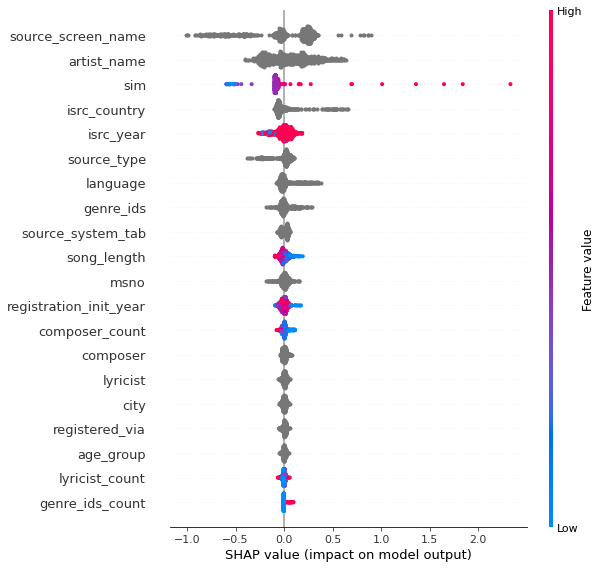

In [21]:
shap_stack.show_shap_values()